# 机器学习课程作业

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## 第一步，选择特征，处理数据，划分训练、预测集

实现自由选取特征的函数

In [3]:
import pandas as pd

def load_excel(file_path):
    """
    读取 Excel 文件并返回 DataFrame。

    参数:
        file_path (str): Excel 文件路径。

    返回:
        pd.DataFrame: 包含数据的 DataFrame。
    """
    try:
        df = pd.read_excel(file_path)
        print("Excel 文件加载成功！")
        return df
    except Exception as e:
        print(f"读取 Excel 文件失败: {e}")
        return None

def select_features_and_label(df, feature_columns, label_column):
    """
    根据用户选择返回特征列和标签列。

    参数:
        df (pd.DataFrame): 数据表。
        feature_columns (list): 特征列名称的列表。
        label_column (str): 标签列的名称。

    返回:
        X (pd.DataFrame): 特征数据。
        y (pd.Series): 标签数据。
    """
    try:
        X = df[feature_columns]
        y = df[label_column]
        print("特征和标签选择成功！")
        return X, y
    except KeyError as e:
        print(f"列名错误: {e}")
        return None, None



再者，对数值型和离散化标签进行处理

In [4]:
def preprocess_data(X, numerical_columns):
    """
    对指定的数值特征进行标准化。

    参数:
        X (pd.DataFrame): 特征数据。
        numerical_columns (list): 明确指定的数值特征列名。

    返回:
        pd.DataFrame: 标准化后的特征数据。
    """
    X = X.copy()
    scaler = StandardScaler()
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    print("指定数值特征标准化完成！")
    return X



我们来试一下

In [5]:
data = load_excel("filled_data.xlsx") 

Excel 文件加载成功！


本次选择所有列，与评论的标签:

"原文长度","情感分数",

"年报资产报酬率（%）","年报资产报酬率TTM（%）","年报营业利润率（%）","年报总资产周转率（次）","年报总资产周转率TTM（次）","年报非流动资产/总资产（%）",

"新闻内容中性分数","新闻内容积极分数","新闻内容消极分数",

"新闻标题类别","新闻标题情绪分数",

"来源类别","发布时间","真实性（虚假1真实0）"

In [6]:
feature_columns = ["情感分数",
                   "年报资产报酬率（%）","年报资产报酬率TTM（%）","年报营业利润率（%）","年报总资产周转率（次）","年报总资产周转率TTM（次）","年报非流动资产/总资产（%）",
                   "新闻内容中性分数",
                   "来源类别","发布时间","真实性（虚假1真实0）"]
label_column = ["预测标签"]
X, y = select_features_and_label(data, feature_columns, label_column)

特征和标签选择成功！


处理那些数值列

In [7]:
numerical_columns = ["情感分数","年报资产报酬率（%）","年报资产报酬率TTM（%）","年报营业利润率（%）","年报总资产周转率（次）","年报总资产周转率TTM（次）","年报非流动资产/总资产（%）","新闻内容中性分数"
                     ,"发布时间"]
X = preprocess_data(X, numerical_columns)

指定数值特征标准化完成！


## XGBOOST

In [15]:
def train_xgboost(X, y):
    """
    使用 XGBoost 进行二分类预测。

    参数:
        X (pd.DataFrame): 特征数据。
        y (pd.Series): 标签数据。

    返回:
        None
    """
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 将标签编码为二进制
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # 转换为 XGBoost 格式
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # 设置模型参数
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'eta': 0.3,
        'seed': 42
    }

    # 训练模型
    bst = xgb.train(params, dtrain, num_boost_round=100)

    # 预测
    y_pred = bst.predict(dtest)
    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

    # 评估
    accuracy = accuracy_score(y_test, y_pred_binary)
    print("模型准确率:", accuracy)
    print("分类报告:\n", classification_report(y_test, y_pred_binary))

In [44]:
train_xgboost(X, y)

模型准确率: 0.5517241379310345
分类报告:
               precision    recall  f1-score   support

           0       0.51      0.50      0.51        80
           1       0.58      0.60      0.59        94

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.55      0.55      0.55       174



c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## SVM

In [46]:
from sklearn.svm import SVC

def train_svm(X, y):
    """
    使用 SVM 进行二分类预测。

    参数:
        X (pd.DataFrame): 特征数据。
        y (pd.Series): 标签数据。

    返回:
        None
    """
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 初始化并训练 SVM 模型
    svm_model = SVC(kernel='sigmoid', C=1.0, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # 预测
    y_pred = svm_model.predict(X_test)

    # 评估
    accuracy = accuracy_score(y_test, y_pred)
    print("SVM 模型准确率:", accuracy)
    print("分类报告:\n", classification_report(y_test, y_pred))


In [47]:
train_svm(X, y)

SVM 模型准确率: 0.5287356321839081
分类报告:
               precision    recall  f1-score   support

           0       0.49      0.46      0.47        80
           1       0.56      0.59      0.57        94

    accuracy                           0.53       174
   macro avg       0.52      0.52      0.52       174
weighted avg       0.53      0.53      0.53       174



c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\envs\dirty_test\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d

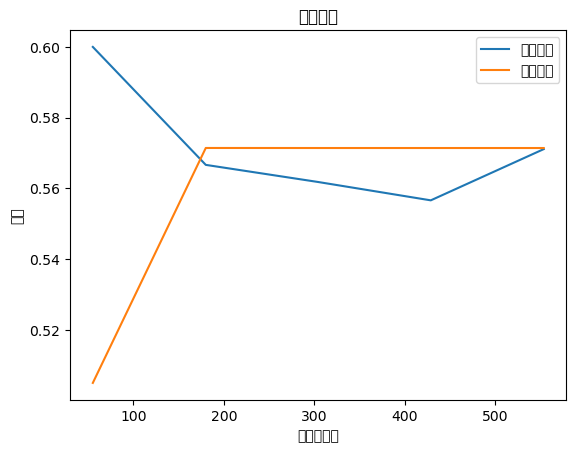

In [52]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='rbf', C=1.0, gamma='scale'), X_train, y_train, cv=5
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="训练得分")
plt.plot(train_sizes, test_scores_mean, label="验证得分")
plt.legend()
plt.xlabel("训练样本数")
plt.ylabel("得分")
plt.title("学习曲线")
plt.show()


## MLP

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):
    def __init__(self, input_dim, layer_sizes, activation_fn):
        """
        初始化多层感知机模型。

        参数:
            input_dim (int): 输入特征的维度。
            layer_sizes (list): 每层神经元个数的列表。
            activation_fn (callable): 激活函数。
        """
        super(MLP, self).__init__()
        layers = []
        current_dim = input_dim
        
        for size in layer_sizes:
            layers.append(nn.Linear(current_dim, size))
            layers.append(activation_fn())
            current_dim = size

        layers.append(nn.Linear(current_dim, 1))  # 输出层
        layers.append(nn.Sigmoid())  # 二分类
        
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def train_mlp_torch(X, y, layer_sizes, activation_fn, epochs=50, batch_size=32, learning_rate=0.001):
    """
    使用 PyTorch 训练多层感知机模型。

    参数:
        X (pd.DataFrame or np.array): 特征数据。
        y (pd.Series or np.array): 标签数据。
        layer_sizes (list): 每层神经元个数的列表。
        activation_fn (callable): 激活函数类。
        epochs (int): 训练轮数。
        batch_size (int): 批量大小。
        learning_rate (float): 学习率。

    返回:
        None
    """
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 转换为 PyTorch 张量
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

    # 数据加载器
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 初始化模型
    input_dim = X_train.shape[1]
    model = MLP(input_dim, layer_sizes, activation_fn)
    criterion = nn.BCELoss()  # 二分类的损失函数
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # 训练模型
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        #print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    # 评估模型
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred_binary = (y_pred.numpy() > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_binary)
    print("MLP (PyTorch) 模型准确率:", accuracy)
    print("分类报告:\n", classification_report(y_test, y_pred_binary))


In [51]:
train_mlp_torch(
            X,
            y,
            layer_sizes=[64,32,32],  # 每层神经元个数
            activation_fn=nn.ReLU,  # 激活函数类
            epochs= 250,
            batch_size=16,
            learning_rate=0.005
        )

MLP (PyTorch) 模型准确率: 0.5172413793103449
分类报告:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49        80
           1       0.56      0.53      0.54        94

    accuracy                           0.52       174
   macro avg       0.52      0.52      0.52       174
weighted avg       0.52      0.52      0.52       174



## 随机森林

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义随机森林模型
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

rf_model = RandomForestClassifier(random_state=42)

# 网格搜索调整超参数
param_grid = {
    'n_estimators': [50, 100, 200],  # 森林中树的数量
    'max_depth': [10, 20],     # 每棵树的最大深度
    'min_samples_split': [2, 5, 10], # 内部分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],   # 叶子节点最小样本数
    'max_features': ['sqrt', 'log2'] # 每次分裂考虑的特征数
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数:", grid_search.best_params_)

# 使用最佳参数重新训练模型
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# 测试集预测
y_pred = best_rf_model.predict(X_test)

# 模型评估
accuracy = accuracy_score(y_test, y_pred)
print(f"随机森林模型准确率: {accuracy:.4f}")
print("\n分类报告:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; t